In [1]:
import numpy as np
import tensorflow  as tf
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import utils
import get_network
import matplotlib.pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





In [3]:
model, sess = get_network.get_model(checkpoint_path='../inception_v4.ckpt')

In [4]:
delta_pl = tf.placeholder(tf.float32, [None, 299, 299, 3])

In [5]:
images = np.load('../data/images.npy')
labels = np.load('../data/labels.npy')

In [6]:
grad_op = utils._grad_across_multi_output(output_tensor=model.logits, input_tensor=model.images_pl, sparse_labels_op=model.labels_pl)
grad_input_op = grad_op * delta_pl

In [7]:
image = images[3]
label = labels[3]

In [8]:
background_reference = np.zeros(image.shape) - 1.0
ig_saliency = utils.get_path_attributions(model, sess, grad_input_op, delta_pl, 
                          image, label, background_reference, num_samples=501,
                          batch_size=32, random_alpha=False, random_sample=False,
                          verbose=True, take_difference=True)
sum_abs_ig = np.abs(np.sum(ig_saliency, axis=-1))

100%|██████████| 16/16 [00:13<00:00,  1.25it/s]


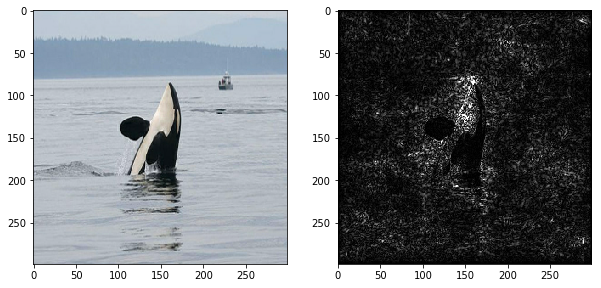

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(utils.normalize(image))
axs[1].imshow(utils.norm_clip(sum_abs_ig), cmap='gray')

In [18]:
k_vals = np.linspace(0.1, 1.0, num=10)

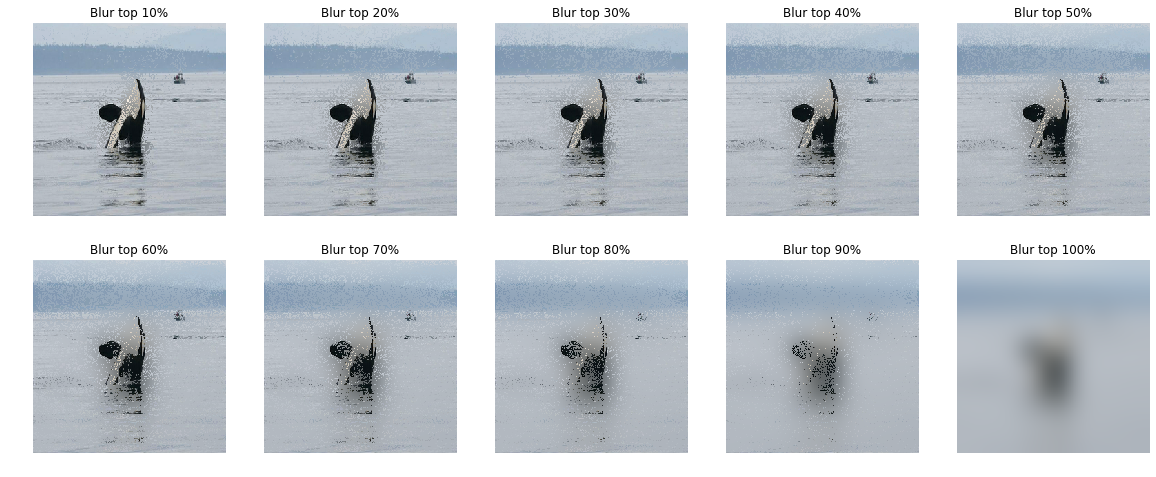

In [31]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, k in enumerate(k_vals):
    ablated_image = utils.ablate_top_k(image, sum_abs_ig, k, method='blur')
    ax = axs[int(i / 5), i % 5]
    ax.imshow(utils.normalize(ablated_image, _domain=[image.min(), image.max()]))
    ax.set_title('Blur top {}%'.format(int(k * 100)))
    ax.axis('off')

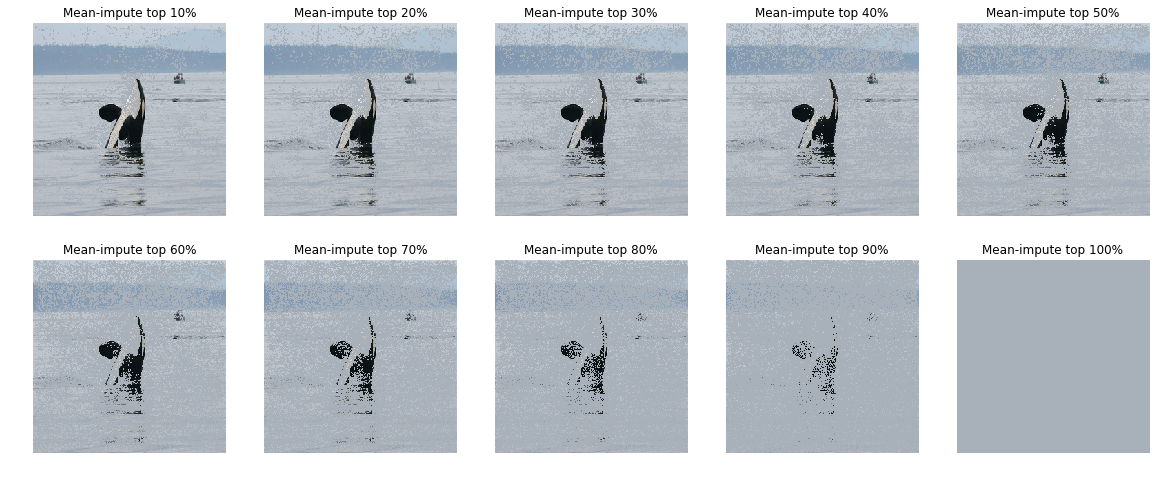

In [32]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, k in enumerate(k_vals):
    ablated_image = utils.ablate_top_k(image, sum_abs_ig, k, method='mean')
    ax = axs[int(i / 5), i % 5]
    ax.imshow(utils.normalize(ablated_image, _domain=[image.min(), image.max()]))
    ax.set_title('Mean-impute top {}%'.format(int(k * 100)))
    ax.axis('off')

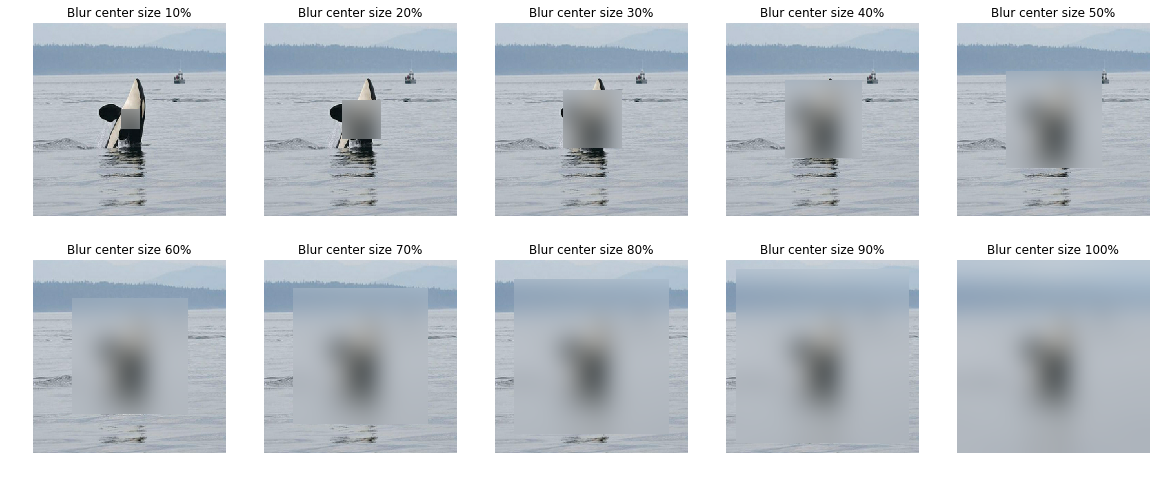

In [33]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, k in enumerate(k_vals):
    ablated_image = utils.ablate_top_k(image, sum_abs_ig, k, method='blur_center')
    ax = axs[int(i / 5), i % 5]
    ax.imshow(utils.normalize(ablated_image, _domain=[image.min(), image.max()]))
    ax.set_title('Blur center size {}%'.format(int(k * 100)))
    ax.axis('off')

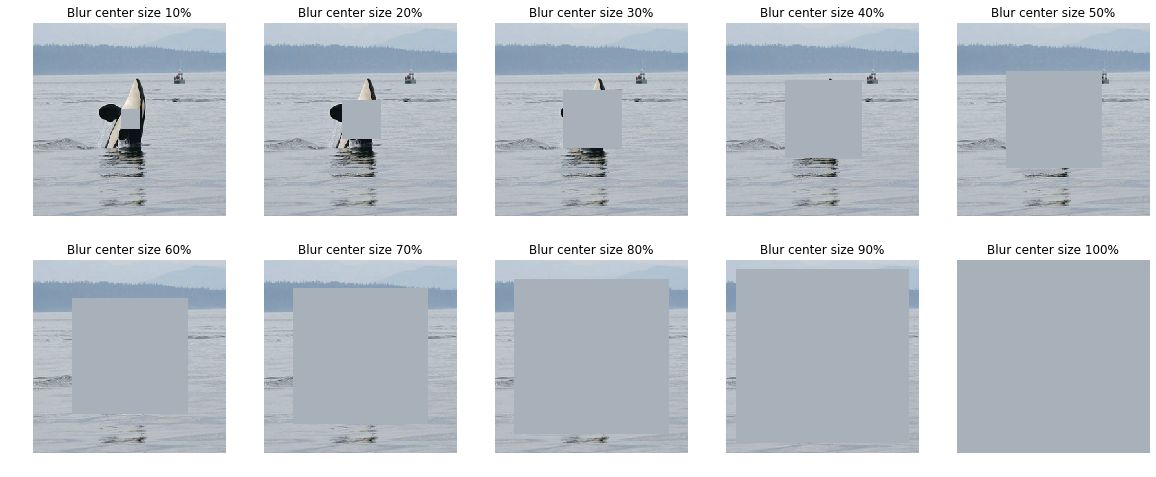

In [34]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, k in enumerate(k_vals):
    ablated_image = utils.ablate_top_k(image, sum_abs_ig, k, method='mean_center')
    ax = axs[int(i / 5), i % 5]
    ax.imshow(utils.normalize(ablated_image, _domain=[image.min(), image.max()]))
    ax.set_title('Blur center size {}%'.format(int(k * 100)))
    ax.axis('off')